## Write gprMax input file

In [7]:
%%writefile cylinder_Bscan_2D.in
#title: B-scan from a metal cylinder buried in a dielectric half-space
#domain: 0.240 0.210 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 3e-9

#material: 6 0 1 0 half_space

#waveform: ricker 1 1.5e9 my_ricker
#hertzian_dipole: z 0.040 0.170 0 my_ricker
#rx: 0.080 0.170 0
#src_steps: 0.002 0 0
#rx_steps: 0.002 0 0

#box: 0 0 0 0.240 0.170 0.002 half_space
#cylinder: 0.120 0.080 0 0.120 0.080 0.002 0.010 pec

#geometry_view: 0 0 0 0.240 0.210 0.002 0.002 0.002 0.002 cylinder_Bscan_2D n

Overwriting cylinder_Bscan_2D.in


## Run model from api

In [ ]:
import gprMax
gprMax.run(inputfile = "cylinder_Bscan_2D.in", n = 10)

## Merge files to B-scan

In [9]:
!python -m toolboxes.Utilities.outputfiles_merge cylinder_Bscan_2D

## Plot B-scan

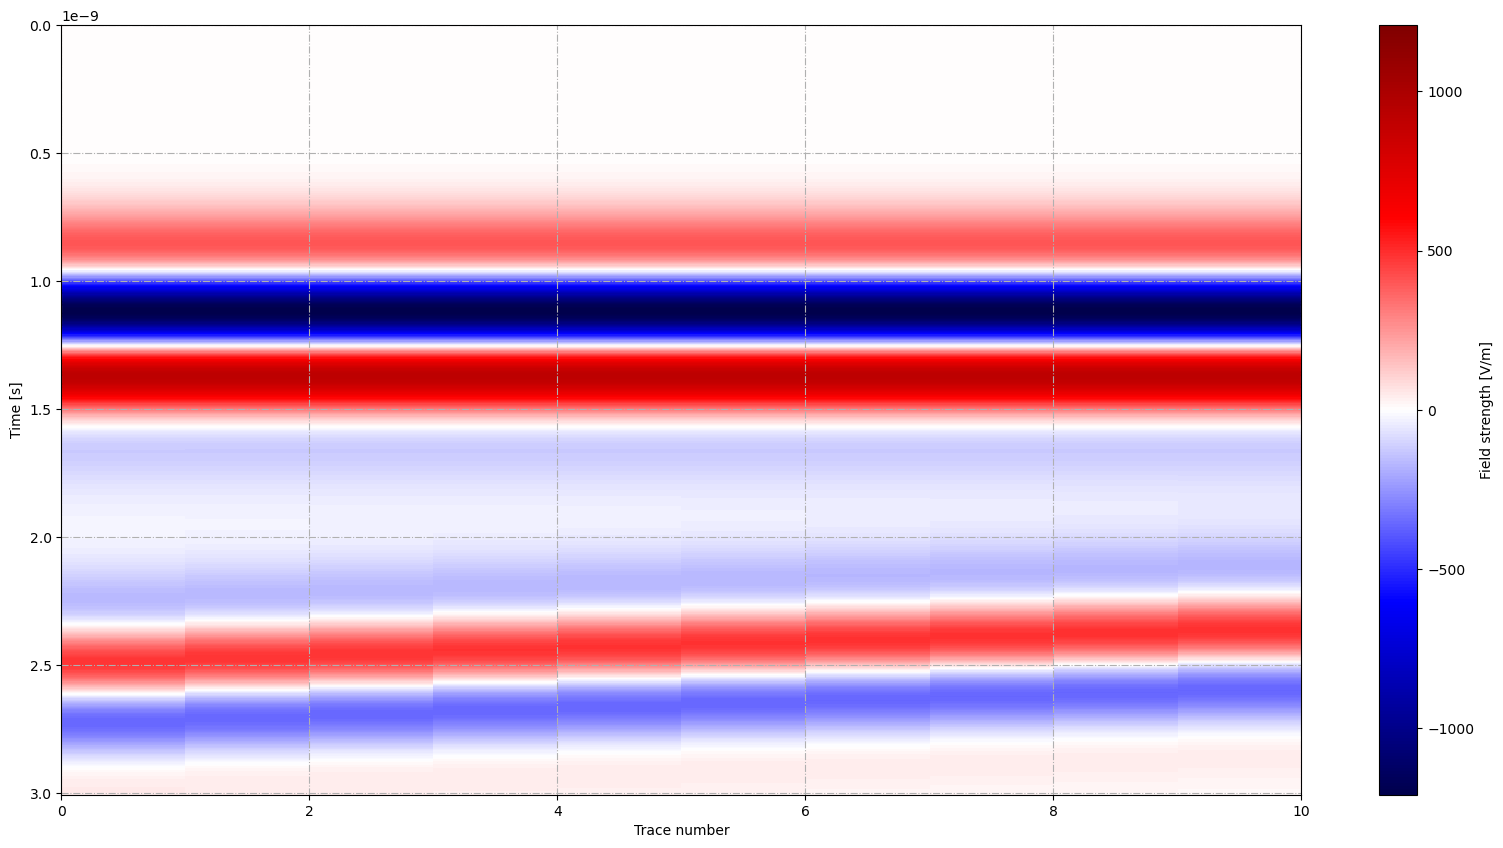

In [10]:
import gprMax
from toolboxes.Plotting.plot_Bscan import get_output_data, mpl_plot

# Choose file

filename = 'cylinder_Bscan_2D_merged.h5'

# Choose output component

rxnumber = 1
rxcomponent = 'Ez'
outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)

# Plot B-scan

plt = mpl_plot(filename, outputdata, dt, rxnumber, rxcomponent)

## Plot 3D modelled geometry


gprMax version: 4.0.0b0


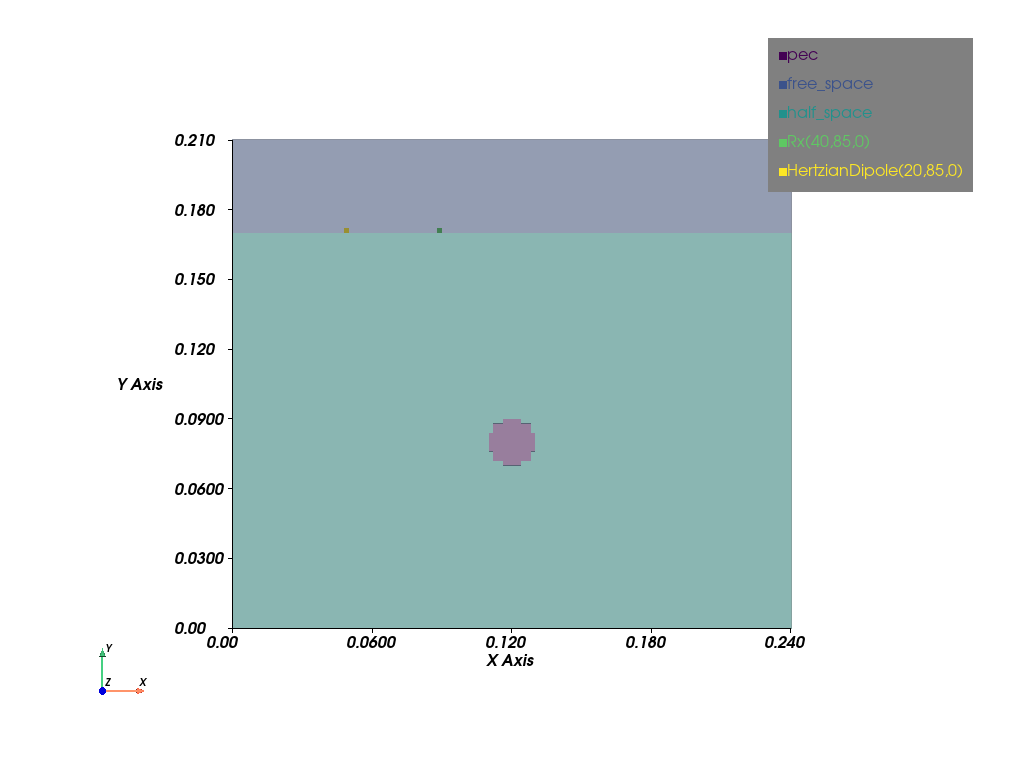

In [1]:
from toolboxes.Plotting.visualization_toolbox.plot_3D_model import visualize_vti_output

visualize_vti_output(filename = "cylinder_Bscan_2D5.vti", orientation="xy", opacity = 0.3, backend = 'static')